In [1]:
import os
import numpy as np
import h5py

In [2]:
from sklearn.datasets import fetch_mldata
from sklearn.decomposition import PCA
import hdbscan
import sklearn.cluster as cluster
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score

In [3]:
import umap

In [67]:
scratch = os.getenv('SCRATCH')
filepath = []
x = range(1,34)
#rint(x)
for i in x:
    filepath.append(scratch + '/'+'ambre_' +str(i)) 
    
print(filepath)

['/scratch/nrpu88/ambre_1', '/scratch/nrpu88/ambre_2', '/scratch/nrpu88/ambre_3', '/scratch/nrpu88/ambre_4', '/scratch/nrpu88/ambre_5', '/scratch/nrpu88/ambre_6', '/scratch/nrpu88/ambre_7', '/scratch/nrpu88/ambre_8', '/scratch/nrpu88/ambre_9', '/scratch/nrpu88/ambre_10', '/scratch/nrpu88/ambre_11', '/scratch/nrpu88/ambre_12', '/scratch/nrpu88/ambre_13', '/scratch/nrpu88/ambre_14', '/scratch/nrpu88/ambre_15', '/scratch/nrpu88/ambre_16', '/scratch/nrpu88/ambre_17', '/scratch/nrpu88/ambre_18', '/scratch/nrpu88/ambre_19', '/scratch/nrpu88/ambre_20', '/scratch/nrpu88/ambre_21', '/scratch/nrpu88/ambre_22', '/scratch/nrpu88/ambre_23', '/scratch/nrpu88/ambre_24', '/scratch/nrpu88/ambre_25', '/scratch/nrpu88/ambre_26', '/scratch/nrpu88/ambre_27', '/scratch/nrpu88/ambre_28', '/scratch/nrpu88/ambre_29', '/scratch/nrpu88/ambre_30', '/scratch/nrpu88/ambre_31', '/scratch/nrpu88/ambre_32', '/scratch/nrpu88/ambre_33']


In [68]:
f = []
for i in filepath:
    f.append(h5py.File(i, 'r'))
print(len(f))
#f1 = h5py.File(filepath1, 'r')
#f2 = h5py.File(filepath2, 'r')
#f3 = h5py.File(filepath3, 'r')
#f4 = h5py.File(filepath4, 'r')
#f5 = h5py.File(filepath5, 'r')


33


In [69]:
#0-ambre
#1-phoenix
#2-intrigoss

dset_sub = []
dset = []
#dset[0][0] has ambre_flux for 1st file
#dset[0][1] has phoenix_flux for 1st file
#dset[0][2] has intrigoss flux for 1st file
for j in f:
    dset_sub.append(j['ambre_flux'])
    dset_sub.append(j['phoenix_flux'])
    dset_sub.append(j['intrigoss_flux'])
    dset.append(dset_sub)
    dset_sub = []

#dset1_a = f1['ambre_flux']
#dset1_p = f1['phoenix_flux']
#dset1_i = f1['intrigoss_flux']
dset = np.asarray(dset)
print(dset[0])
print(dset.shape)

[<HDF5 dataset "ambre_flux": shape (410, 10000), type "<f8">
 <HDF5 dataset "phoenix_flux": shape (164, 10000), type "<f8">
 <HDF5 dataset "intrigoss_flux": shape (328, 10000), type "<f8">]
(33, 3)


In [70]:
flux_a_fin_sub = []
flux_p_fin_sub = []
flux_i_fin_sub = []

#print(len(dset[0][0]))
for i in range(33):
        for k in dset[i][0]:            
            flux_a_fin_sub.append(k)
        for l in dset[i][1]:
            flux_p_fin_sub.append(l)
        for m in dset[i][2]:
            flux_i_fin_sub.append(m)

In [71]:
flux_a_fin = np.asarray(flux_a_fin_sub)
flux_p_fin = np.asarray(flux_p_fin_sub)
flux_i_fin = np.asarray(flux_i_fin_sub)



print(flux_a_fin.shape)
print(flux_p_fin.shape)
print(flux_i_fin.shape)

(13734, 10000)
(5822, 10000)
(10578, 10000)


In [72]:
grid_data = []
for i in flux_i_fin:
    grid_data.append(i)
for j in flux_p_fin:
    grid_data.append(j)
for k in flux_a_fin:
    grid_data.append(k)

grid_data = np.asarray(grid_data)
print(grid_data.shape)

(30134, 10000)


In [73]:
reducer = umap.UMAP(init = 'random')
embedding = reducer.fit_transform(grid_data)

In [74]:
embedding.shape

(30134, 2)

In [75]:
grid_target=[]
for i in range(len(flux_i_fin)):
    grid_target.append(0)
for j in range(len(flux_p_fin)):
    grid_target.append(1)
for k in range(len(flux_a_fin)):
    grid_target.append(2)

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

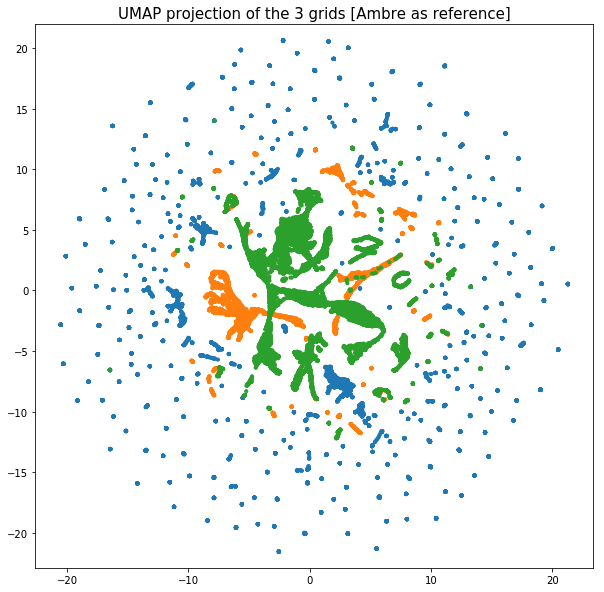

In [78]:
fig, ax = plt.subplots(figsize = (10,10))
ax.scatter(embedding[:, 0], embedding[:, 1], c=[sns.color_palette()[x] for x in grid_target],s = 10)
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the 3 grids [Ambre as reference]', fontsize=15);
plt.savefig('umap_ambre.png')
#Blue-intrigoss
#Green-ambre
#Orange-phoenix